# Monte Carlo Simulação de preços de ações

In [12]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
from datetime import timedelta

In [13]:
carteira = ['VALE3.SA']
end_d = datetime.now()
start_d = end_d - timedelta(1825)

mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = pdr.DataReader(t,data_source='yahoo',start=start_d, end =end_d)['Adj Close']

<AxesSubplot:xlabel='Date'>

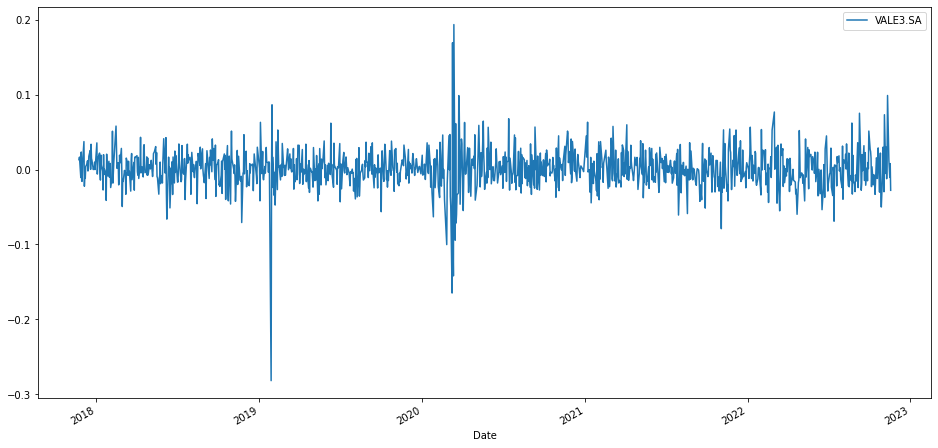

In [14]:
df_log= np.log(mdata / mdata.shift(1))
df_log.plot(figsize=(16,8))

<AxesSubplot:xlabel='Date'>

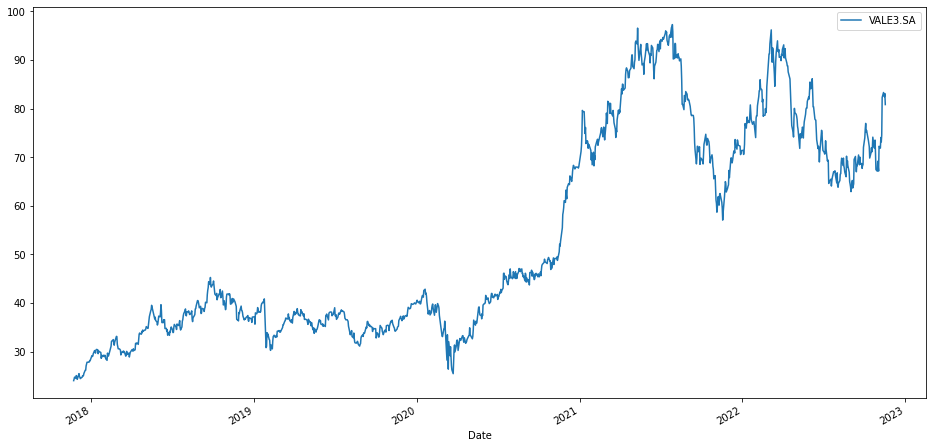

In [15]:
mdata.plot(figsize=(16,8))

In [16]:
# vaos calcular a media e a variancia dos retornos logatimos
media = df_log.mean()


In [17]:
variancia = df_log.var()
variancia

VALE3.SA    0.000679
dtype: float64

### Calcular o drift

$$
drift = u - \frac{1}{2} \cdot var
$$

In [18]:
drift = media - (0.5 * variancia)

In [19]:
#agora vamos fazer o desvio padrao dos retorno logaritimos
stdev_retornos_log = df_log.std()
stdev_retornos_log

VALE3.SA    0.026056
dtype: float64

In [20]:
drift 

VALE3.SA    0.000641
dtype: float64

In [21]:
tempo_intervalos = 1000
interacao = 10

$$
daily\_returns = exp({drift} + {stdev} * z), 
$$ 
<br>
$$
where\  z = norm.ppf(np.random.rand(t\_intervals, iterations)
$$

In [22]:
retornos_diarios = np.exp(drift.values + stdev_retornos_log.values * norm.ppf(np.random.rand(tempo_intervalos, interacao)))
retornos_diarios

array([[0.9628657 , 1.01717281, 0.96833082, ..., 0.9704935 , 0.99721045,
        1.0045349 ],
       [0.98392035, 0.94485185, 1.01883673, ..., 1.03134952, 0.99763126,
        1.01775715],
       [1.00879081, 1.04734592, 1.02904597, ..., 0.9807772 , 1.03034682,
        1.05144661],
       ...,
       [1.00377472, 1.02943768, 0.97411529, ..., 0.94396362, 0.94198217,
        0.98622139],
       [0.96350036, 0.99442434, 0.99957657, ..., 1.00065497, 0.95631577,
        0.99521466],
       [1.03363597, 1.01596133, 1.04701985, ..., 1.02544879, 0.98768701,
        1.02480356]])

In [23]:
#agora vamos pegar o valor do preço de partida, por logica vamos usar o ultimo valor da data atual.
preco_par_inicial =  mdata.iloc[-1]
preco_par_inicial

VALE3.SA    80.830002
Name: 2022-11-18 00:00:00, dtype: float64

In [24]:
#vamos cria uma matriz como o msm tamanho de nossa matriz de retornos diarios
#vamos umsar uma funcção do pandas que ja faz isso rapido para noix e ja coloca o valor zerados
lista_de_precos = np.zeros_like(retornos_diarios)
lista_de_precos

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
#apenas testei para saber se iria nas possiçoes corretas 
lista_de_precos[0] = preco_par_inicial
lista_de_precos

array([[80.83000183, 80.83000183, 80.83000183, ..., 80.83000183,
        80.83000183, 80.83000183],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
#vamos zubstituir o zeros pelos valores com os reotrnos diarios
#usando um for
for t in range(1, tempo_intervalos):
        lista_de_precos[t] = lista_de_precos[t-1]*retornos_diarios[t]

        
lista_de_precos        

array([[ 80.83000183,  80.83000183,  80.83000183, ...,  80.83000183,
         80.83000183,  80.83000183],
       [ 79.5302834 ,  76.37237688,  82.35257511, ...,  83.36398384,
         80.63853634,  82.2653121 ],
       [ 80.22941908,  79.98829732,  84.74458591, ...,  81.76149424,
         83.08565958,  86.49758387],
       ...,
       [ 82.98133782, 248.33367686, 248.52674758, ...,  99.92237533,
        349.48612479, 530.27247311],
       [ 79.95254915, 246.94905329, 248.421514  , ...,  99.98782174,
        334.21909149, 527.73493729],
       [ 82.64183071, 250.89068819, 260.10225662, ..., 102.53239132,
        330.10385497, 540.82464015]])

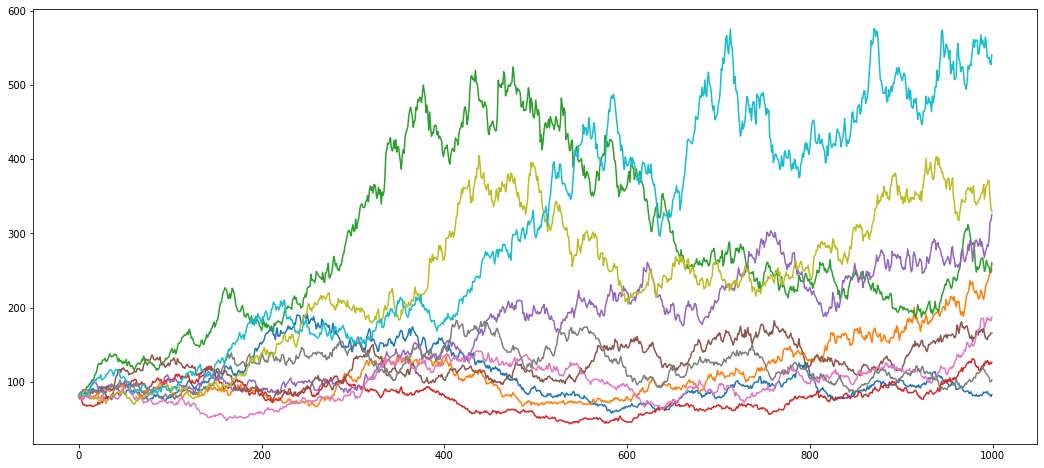

In [27]:
#agora só por num grafico para ficar vizual como serio os preços dessa ação nos proximo 1000 dias
plt.figure(figsize=(18,8))
plt.plot(lista_de_precos)